In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import sqrt, arange
from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

student = pd.read_csv("~/Classes/Packt_Data_Analysis/data/data/student/student.csv", sep=";")

student.rename(columns={'sex':'gender'}, inplace=True)
student['alcohol_index'] = (5 * student['Dalc'] + 2 * student['Walc'])/7

# Alcohol consumption level
student['acl'] = student['alcohol_index'] <= 2
student['acl'] = student['acl'].map({True: 'Low', False: 'High'})

 # Do male teenagers drink more than female teenagers?

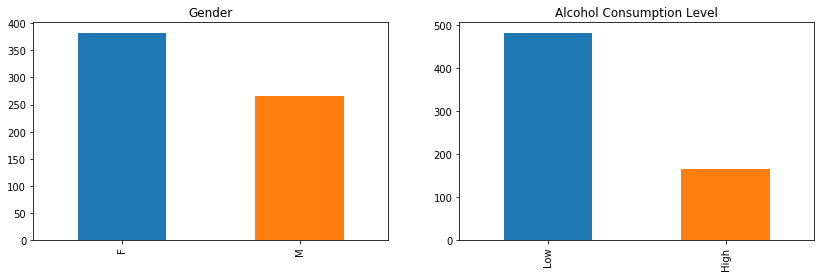

In [2]:
fig, axes = plt.subplots(1, 2, figsize = (14, 4))
student['gender'].value_counts().plot(kind = 'bar', ax = axes[0], title = 'Gender')
student['acl'].value_counts().plot(kind = 'bar', ax = axes[1], title = 'Alcohol Consumption Level');

In [3]:
gender_acl_table = pd.crosstab(student['acl'], student['gender'])
gender_acl_table

gender,F,M
acl,,
High,62,104
Low,321,162


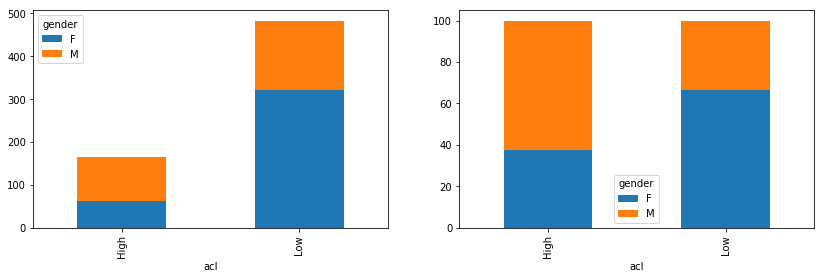

In [5]:
fig, axes = plt.subplots(1, 2, figsize = (14, 4))
gender_acl_table.plot(kind = 'bar', stacked = True, ax = axes[0]);
(100 * (gender_acl_table.T/gender_acl_table.apply(sum, axis = 1)).T).plot(kind= 'bar', stacked = True, ax = axes[1]);

Chi-square test of independence of variables in contingency table.

This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table.

In [6]:
chi_stat, p_value, dof, expected = stats.chi2_contingency(gender_acl_table)

In [7]:
p_value

8.72933011769437e-11

In [8]:
expected_table = pd.DataFrame(expected, index = ['High', 'Low'], columns = ['F', 'M'])
expected_table

,F,M
High,97.96302,68.03698
Low,285.03698,197.96302


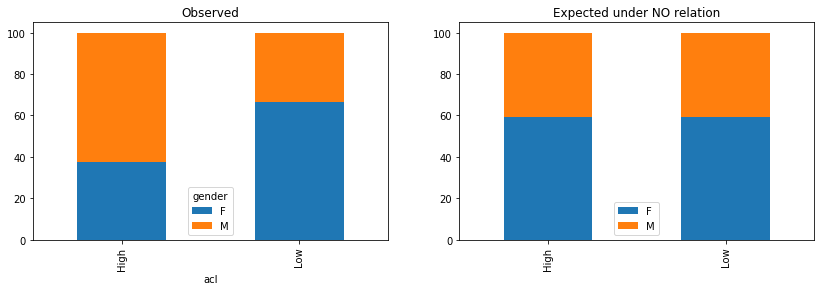

In [9]:
fig, axes = plt.subplots(1, 2, figsize = (14, 4))
(100 * (gender_acl_table.T/gender_acl_table.apply(sum, axis=1)).T)\
.plot(kind = 'bar', stacked = True, title = 'Observed', ax = axes[0]);

(100 * (expected_table.T/expected_table.apply(sum, axis=1)).T)\
.plot(kind = 'bar', stacked = True, title = 'Expected under NO relation', ax = axes[1]);